In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sales = pd.read_csv('sales_train_v2.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_test[df_test['shop_id']==2]

,ID,shop_id,item_id
20400,20400,2,5037
20401,20401,2,5320
20402,20402,2,5233
20403,20403,2,5232
20404,20404,2,5268
...,...,...,...
25495,25495,2,18454
25496,25496,2,16188
25497,25497,2,15757
25498,25498,2,19648


In [4]:
grouped_df = df_test[df_test['shop_id']==2].sort_values(['item_id'])
grouped_df

,ID,shop_id,item_id
22987,22987,2,30
20994,20994,2,31
20995,20995,2,32
22492,22492,2,33
22491,22491,2,38
...,...,...,...
22075,22075,2,22162
21299,21299,2,22163
21742,21742,2,22164
24828,24828,2,22166


In [5]:
df_test.loc[df_test['item_id']==5037].head(10)

,ID,shop_id,item_id
0,0,5,5037
5100,5100,4,5037
10200,10200,6,5037
15300,15300,3,5037
20400,20400,2,5037
25500,25500,7,5037
30600,30600,10,5037
35700,35700,12,5037
40800,40800,28,5037
45900,45900,31,5037


# Plot the monthly sales for all shop_id for item 5037 and 5038

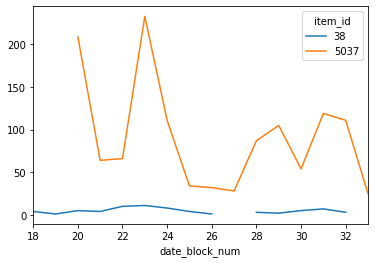

In [119]:
df_sales_shop_id = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                ((df_sales['item_id']==5037)|(df_sales['item_id']==5038))]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id.unstack(level=1).plot()


# Plot the month sales for shop_id == 2 for item 5037 and 5038

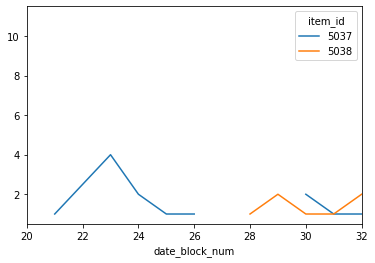

In [7]:
df_sales_shop_id = df_sales.loc[(df_sales['shop_id']==2)&(df_sales['item_cnt_day']>0)&((df_sales['item_id']==5037)|(df_sales['item_id']==5038))]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id.unstack(level=1).plot()

# Plot items 18454 and 969 to shop drop in sales over time

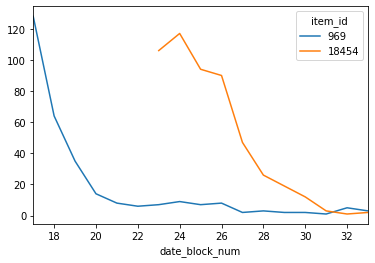

In [123]:
df_sales_shop_id = df_sales.loc[(df_sales['item_cnt_day']>0)&
                                ((df_sales['item_id']==18454)|(df_sales['item_id']==969))]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id.unstack(level=1).plot()

# Sum the total number of items sold in month 33 for shop_id 2

In [8]:
df_sales_shop_id = df_sales.loc[(df_sales['shop_id']==2)&(df_sales['item_cnt_day']>0)]
df_sales_shop_id = df_sales_shop_id.groupby(['date_block_num','item_id'])['item_cnt_day'].sum()
df_sales_shop_id = df_sales_shop_id.reset_index(name='item_cnt_month')

df_sales_shop_id[df_sales_shop_id['date_block_num']==33]['item_cnt_month'].sum()

727.0

# Compare prices for item_id 5037 for different shops

In [12]:
df_sales[df_sales['item_id']==5037]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953995,21.09.2014,20,5,5037,2599.0,1.0
1956692,12.09.2014,20,4,5037,2599.0,1.0
1956970,12.09.2014,20,3,5037,2599.0,1.0
1956971,14.09.2014,20,3,5037,2599.0,1.0
1956972,18.09.2014,20,3,5037,2599.0,1.0
...,...,...,...,...,...,...
2925201,31.10.2015,33,26,5037,1499.0,1.0
2925689,06.10.2015,33,31,5037,1499.0,1.0
2929098,11.10.2015,33,24,5037,1499.0,1.0
2931908,29.10.2015,33,21,5037,1499.0,1.0


In [49]:
df_sales_shop_price = df_sales.loc[((df_sales['shop_id']==2)|(df_sales['shop_id']==4))&(df_sales['item_cnt_day']>0)]
df_sales_shop_price = df_sales_shop_price[df_sales_shop_price['item_id']==5037].groupby(['date_block_num','item_price','shop_id'])['item_cnt_day'].sum().reset_index(name='item_cnt_month')
df_sales_shop_price

,date_block_num,item_price,shop_id,item_cnt_month
0,20,2599.000000,4,1.0
1,21,2599.000000,2,1.0
2,23,1999.000000,2,4.0
3,23,1999.000000,4,2.0
4,24,1999.000000,2,2.0
5,25,2599.000000,2,1.0
6,26,2599.000000,2,1.0
7,30,1499.000000,2,2.0
8,31,749.000000,2,1.0
9,31,749.333333,4,3.0


# Plot the prices for item id 5037 for all shops

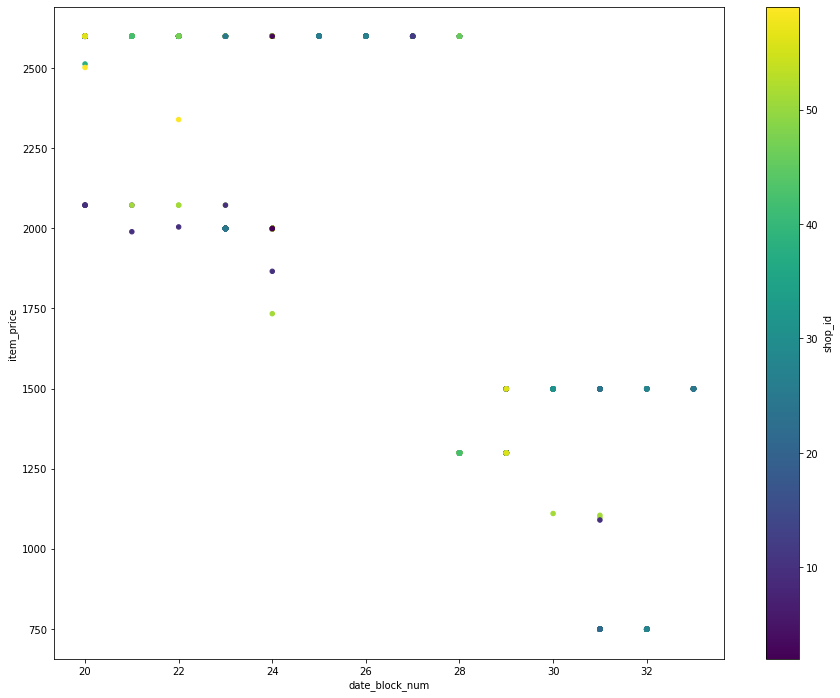

In [126]:
df_sales_shop_price = df_sales.loc[(df_sales['item_cnt_day']>0)&(df_sales['item_id']==5037)]
df_sales_plot =df_sales_shop_price[[ 'date_block_num','shop_id','item_price']]
fig, ax = plt.subplots(figsize=(15,12))
df_sales_plot.plot.scatter(ax=ax,x='date_block_num', y = 'item_price', c='shop_id',colormap='viridis')
